<a href="https://colab.research.google.com/github/zetawolfx2/Machine-learning-repo/blob/master/Reinforcement_Learning/Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing Thompson Sampling

In [9]:
import random
N = 10000
d = 10
ads_selected = []
number_of_rewards1 = [0] * d
number_of_rewards0 = [0] * d
total_rewards = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range (0, d):
        random_beta = random.betavariate(number_of_rewards1[i] + 1, number_of_rewards0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad) # [0, 1, ...]
    result = dataset.values[n, ad]
    if result == 1:
        number_of_rewards1[ad] = number_of_rewards1[ad] + 1
    else:
        number_of_rewards0[ad] = number_of_rewards0[ad] + 1
    total_rewards = total_rewards + result

## Visualising the results - Histogram

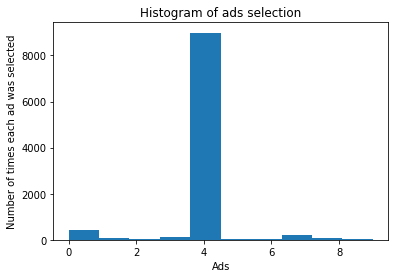

In [10]:
plt.hist(ads_selected) #Plots how many times a certain value is come across
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()